In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from langdetect import detect
import spacy
from sklearn.metrics import roc_curve, auc

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#importing our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
data_all = pd.read_csv('r_news_all_EDAed_jan_to_may_2021.csv')
data_all = data_all.drop('Unnamed: 0', axis=1)

In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166428 entries, 0 to 166427
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Post ID                166428 non-null  object 
 1   Title                  166428 non-null  object 
 2   Url                    166428 non-null  object 
 3   Author                 166428 non-null  object 
 4   Score                  166428 non-null  int64  
 5   Publish Date           166428 non-null  object 
 6   Total No. of Comments  166428 non-null  int64  
 7   Permalink              166428 non-null  object 
 8   Flair                  6592 non-null    object 
 9   duplicate              166428 non-null  bool   
 10  Engagement             166428 non-null  int64  
 11  title_case_correct     166428 non-null  object 
 12  title_words            166428 non-null  object 
 13  language               166428 non-null  object 
 14  lemmatized             166428 non-nu

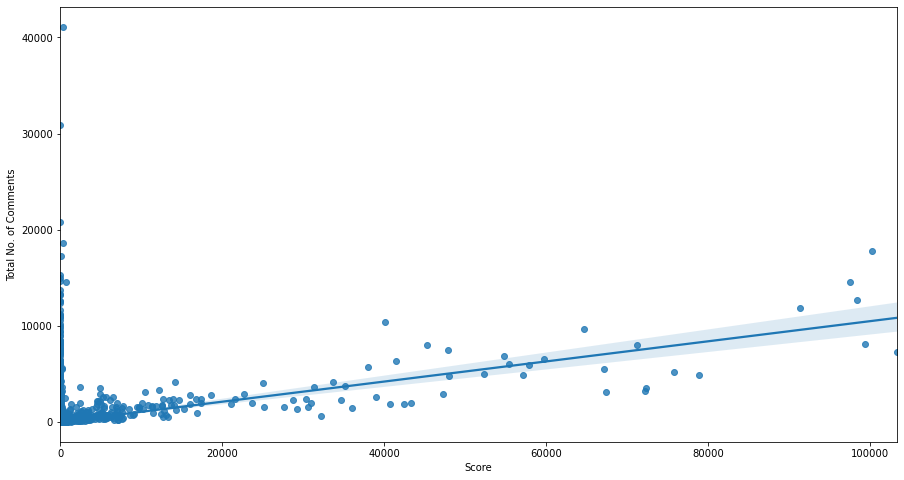

In [9]:
# Check relationship between Score and # Comments
plt.figure(figsize=(15,8))
sns.regplot(x=data_all.Score, y=data_all['Total No. of Comments'])
plt.savefig('r_news_score_comm.png')
plt.show()

In [10]:
data_all_eng_5 = data_all[data_all['eng_band'] == 'Top 5']
data_all_eng_45 = data_all[data_all['eng_band'] == 'Middle 45']
data_all_eng_50 = data_all[data_all['eng_band'] == 'Bottom 50']

<AxesSubplot:xlabel='eng_band', ylabel='Engagement'>

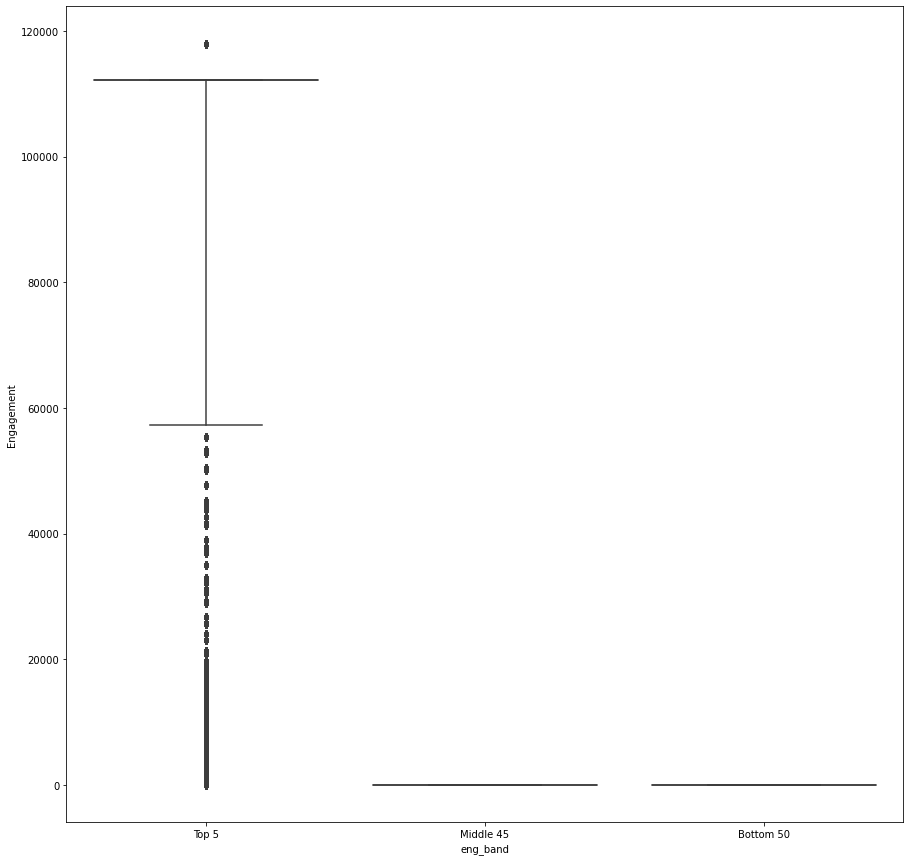

In [51]:
plt.figure(figsize=(15,15))
plt.savefig('r_news_eng_comp.png')
sns.boxplot(data=data_all['Engagement'], x=data_all['eng_band'], y=data_all['Engagement'], whis=[5,95])

In [34]:
data_all.describe()

,Score,Total No. of Comments,Engagement,score_percentile,comments_percentile,engagement_percentile
count,166428.000000,166428.000000,166428.00000,166428.000000,166428.000000,166428.000000
mean,23.973610,20.872780,44.84639,0.500003,0.500003,0.500003
std,990.467345,303.314874,1130.71616,0.107643,0.157959,0.169589
min,0.000000,0.000000,0.00000,0.001628,0.444078,0.000724
25%,1.000000,0.000000,1.00000,0.478913,0.444078,0.435639
50%,1.000000,0.000000,1.00000,0.478913,0.444078,0.435639
75%,1.000000,0.000000,1.00000,0.478913,0.444078,0.435639
max,103302.000000,41107.000000,117980.00000,1.000000,1.000000,1.000000


In [52]:
data_all[data_all['eng_band'] == 'Top 5'].min()

Post ID                                                             ko10oh
Title                    "An absolute, utter shock": Doctor fired after...
Url                      http://1057news.com/2021/03/30/07/02/53/tennes...
Author                                                      ---Sanguine---
Score                                                                    0
Publish Date                                           2020-12-31 16:00:06
Total No. of Comments                                                    0
Permalink                /r/news/comments/ko10oh/covid19_update_takeout...
duplicate                                                            False
Engagement                                                              20
title_case_correct       1 dead 2 hurt in las vegas strip shooting susp...
title_words              ['1', '17', 'people', 'los', 'angeles', 'count...
language                                                                en
lemmatized               

In [56]:
data_all[data_all['Post ID'] == 'ko10oh'].describe()

,Score,Total No. of Comments,Engagement,score_percentile,comments_percentile,engagement_percentile
count,1.0,1.0,1.0,1.000000,1.000000,1.000000
mean,20.0,0.0,20.0,0.990239,0.444078,0.950264
std,NaN,NaN,NaN,NaN,NaN,NaN
min,20.0,0.0,20.0,0.990239,0.444078,0.950264
25%,20.0,0.0,20.0,0.990239,0.444078,0.950264
50%,20.0,0.0,20.0,0.990239,0.444078,0.950264
75%,20.0,0.0,20.0,0.990239,0.444078,0.950264
max,20.0,0.0,20.0,0.990239,0.444078,0.950264
